# 1.Preprocessing

In [1]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
path=Path()
parent_path=str(path.parent.absolute())[:-10]

In [3]:
removed_csv=parent_path+"/data/csvs/hmda_2017_ca_noname.csv"

In [4]:
numerics = ['loan_amount_000s', 'applicant_income_000s', 'population', 'minority_population',
            'hud_median_family_income', 'tract_to_msamd_income', 'number_of_owner_occupied_units',
            'number_of_1_to_4_family_units', 'application_date_indicator', 'rate_spread']
dtypes={}
for num in numerics:
        dtypes[num] = 'float64'

In [5]:
skimmed_df=pd.read_csv(removed_csv, low_memory=False, dtype=dtypes, na_values=' ')

In [6]:
js_road=parent_path+"/src/data_processing/code_map.json"

In [7]:
with open(js_road, 'r') as fh:
    code_map=json.load(fh)
    for i in code_map.keys():
        code_map[i]={int(m):n for m, n in code_map[i].items()}

In [8]:
skimmed_df.columns

Index(['as_of_year', 'respondent_id', 'agency_abbr', 'agency_code',
       'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy',
       'loan_amount_000s', 'preapproval', 'action_taken', 'msamd',
       'state_abbr', 'state_code', 'county_code', 'census_tract_number',
       'applicant_ethnicity', 'co_applicant_ethnicity', 'applicant_race_1',
       'applicant_race_2', 'applicant_race_3', 'applicant_race_4',
       'applicant_race_5', 'co_applicant_race_1', 'co_applicant_race_2',
       'co_applicant_race_3', 'co_applicant_race_4', 'co_applicant_race_5',
       'applicant_sex', 'co_applicant_sex', 'applicant_income_000s',
       'purchaser_type', 'denial_reason_1', 'denial_reason_2',
       'denial_reason_3', 'rate_spread', 'hoepa_status', 'lien_status',
       'edit_status', 'sequence_number', 'population', 'minority_population',
       'hud_median_family_income', 'tract_to_msamd_income',
       'number_of_owner_occupied_units', 'number_of_1_to_4_family_units',
       'appl

In [9]:
code_map.keys()

dict_keys(['agency', 'loan_type', 'property_type', 'loan_purpose', 'owner_occupancy', 'preapproval', 'action_taken', 'ethnicity', 'race', 'sex', 'purchaser_type', 'denial_reason', 'hoepa_status', 'lien_status', 'edit_status', 'county'])

In [10]:
image_path=parent_path+'/result/eda/'
if not os.path.exists(image_path):
    os.makedirs(image_path)

# Race analysis

# a.) all applicant

In [11]:
skimmed_df['applicant_race_1']

0          5
1          2
2          6
3          5
4          5
          ..
1157690    7
1157691    4
1157692    6
1157693    6
1157694    7
Name: applicant_race_1, Length: 1157695, dtype: int64

In [12]:
RaceMap=code_map['race'].copy()
#genderMap[3]='Information not provided by applicant'

In [13]:
RaceMap=code_map['race'].copy()
RaceMap[6]='Unknown'
RaceMap[7]='Unknown'

In [14]:
RaceMap

{1: 'American Indian or Alaska Native',
 2: 'Asian',
 3: 'Black or African American',
 4: 'Native Hawaiian or Other Pacific Islander',
 5: 'White',
 6: 'Unknown',
 7: 'Unknown',
 8: 'No co-applicant'}

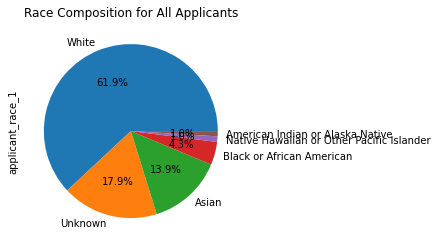

In [15]:
Race_total=skimmed_df['applicant_race_1'].replace(RaceMap).value_counts()
plt.figure(figsize=(8,8))
Race_total=Race_total.rename(index=RaceMap)
Race_total.plot.pie(legend=False, title='Race Composition for All Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Total_applicant_gender.png', bbox_inches='tight')

In [144]:
skimmed_df['action_taken']

0          3
1          3
2          1
3          3
4          2
          ..
1157690    3
1157691    3
1157692    3
1157693    3
1157694    3
Name: action_taken, Length: 1157695, dtype: int64

In [145]:
actionM=code_map['action_taken']
actionM

{1: 'Loan originated',
 2: 'Application approved but not accepted',
 3: 'Application denied by financial institution',
 4: 'Application withdrawn by applicant',
 5: 'File closed for incompleteness',
 6: 'Loan purchased by the institution',
 7: 'Preapproval request denied by financial institution',
 8: 'Preapproval request approved but not accepted'}

In [146]:
Race_result

,applicant_race_1,action_taken
0,5,3
1,2,3
2,6,1
3,5,3
4,5,2
...,...,...
1157690,7,3
1157691,4,3
1157692,6,3
1157693,6,3


<Figure size 1440x1440 with 0 Axes>

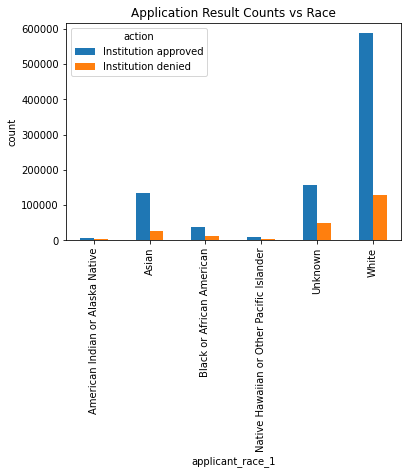

In [147]:
Race_result=skimmed_df[['applicant_race_1','action_taken']]
RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
Race_result_b=pd.DataFrame()
Race_result_b['action']= Race_result['action_taken'].replace(RecodeAction)
Race_result_b['applicant_race_1']=Race_result['applicant_race_1'].replace(RaceMap)
Race_result_a1=Race_result_b.pivot_table(index='applicant_race_1', columns='action',aggfunc='size',fill_value=0)
plt.figure(figsize=(20,20))
Race_result_a1.plot.bar(title='Application Result Counts vs Race')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.savefig(image_path+'Application_result_count_race.png', bbox_inches='tight')

<Figure size 720x720 with 0 Axes>

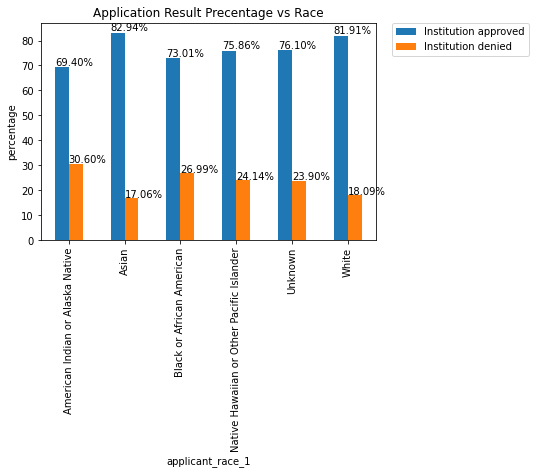

In [148]:
totalSA1=Race_result_a1.sum(axis=1)
Race_result_a2=Race_result_a1.T
temp=Race_result_a2/totalSA1.values
Race_result_a2=temp.T*100
plt.figure(figsize=(10,10))
SA2B=Race_result_a2.plot.bar(title='Application Result Precentage vs Race')
for p in SA2B.patches:
    SA2B.annotate(str("%.2f"%p.get_height())+'%', xy=(p.get_x(), p.get_height()*1.01))
plt.xticks(rotation=90)
plt.ylabel('percentage')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(image_path+'Application_result_percentage_race.png', bbox_inches='tight')

In [149]:
l1=list(RaceMap.values())
Race_l=sorted(set(l1),key=l1.index)
Race_l=Race_l[0:6]
Race_l

['American Indian or Alaska Native',
 'Asian',
 'Black or African American',
 'Native Hawaiian or Other Pacific Islander',
 'White',
 'Unknown']

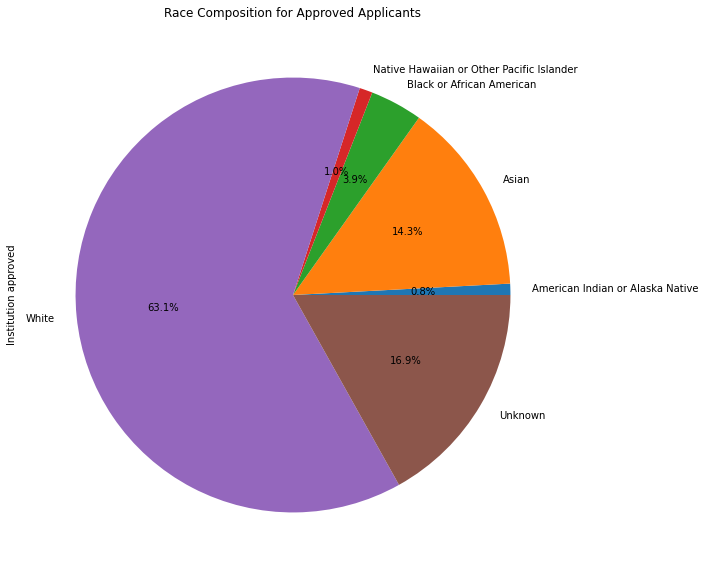

In [150]:
Race_result_approve=Race_result_a1['Institution approved'].replace(RaceMap).reindex(index=Race_l)
plt.figure(figsize=(10,10))
Race_result_approve.plot.pie(legend=False, title='Race Composition for Approved Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Approved_applicant_race.png', bbox_inches='tight')

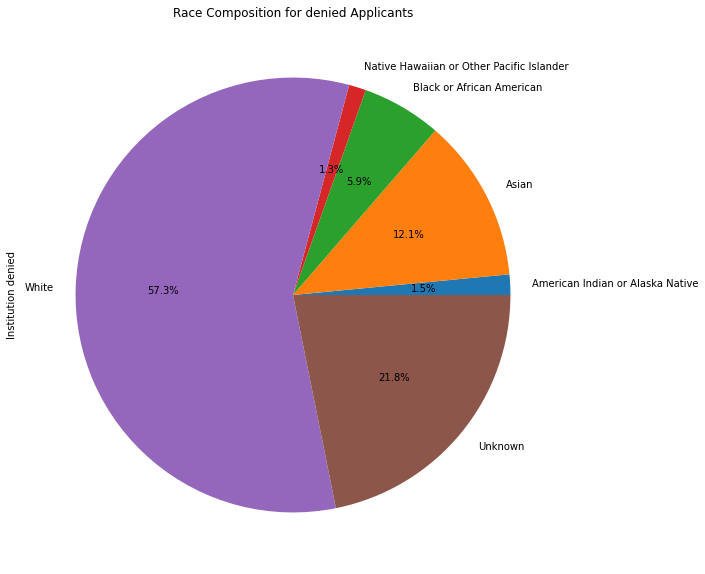

In [151]:
Race_result_approve=Race_result_a1['Institution denied'].replace(RaceMap).reindex(index=Race_l)
plt.figure(figsize=(10,10))
Race_result_approve.plot.pie(legend=False, title='Race Composition for denied Applicants',autopct='%1.1f%%')
plt.savefig(image_path+'Denied_applicant_race.png', bbox_inches='tight')

# b. co-applicant vs no co-applicant

In [153]:
Coappli=skimmed_df[skimmed_df['co_applicant_race_1']!=8]
Nonco=skimmed_df[skimmed_df['co_applicant_race_1']==8]


In [154]:
Nonco

,as_of_year,respondent_id,agency_abbr,agency_code,loan_type,property_type,loan_purpose,owner_occupancy,loan_amount_000s,preapproval,...,lien_status,edit_status,sequence_number,population,minority_population,hud_median_family_income,tract_to_msamd_income,number_of_owner_occupied_units,number_of_1_to_4_family_units,application_date_indicator
1,2017,0000146672,CFPB,9,1,1,1,2,185.0,3,...,1,NaN,NaN,7404.0,57.520000,63200.0,116.010002,1215.0,1743.0,NaN
4,2017,33-0419992,HUD,7,2,1,3,1,379.0,3,...,1,NaN,NaN,5356.0,23.100000,75200.0,126.690002,1711.0,2102.0,NaN
5,2017,72-1545376,HUD,7,2,1,1,1,325.0,3,...,1,NaN,NaN,3944.0,52.000000,63200.0,75.089996,485.0,708.0,NaN
6,2017,80-0233937,HUD,7,1,1,3,1,424.0,3,...,1,NaN,NaN,2063.0,61.950001,50000.0,193.210007,447.0,668.0,NaN
8,2017,7056000000,HUD,7,2,1,3,1,311.0,3,...,1,NaN,NaN,5431.0,97.809998,97400.0,43.119999,608.0,1393.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157690,2017,0000028489,FDIC,3,1,3,3,3,1050.0,3,...,1,NaN,NaN,5838.0,96.089996,79300.0,41.410000,203.0,820.0,NaN
1157691,2017,0000058828,FDIC,3,1,3,3,3,450.0,3,...,1,NaN,NaN,5058.0,51.840000,53000.0,124.680000,787.0,1812.0,NaN
1157692,2017,0000028489,FDIC,3,1,3,1,3,1568.0,3,...,1,NaN,NaN,5067.0,78.940002,79300.0,123.430000,789.0,1099.0,NaN
1157693,2017,0000451965,CFPB,9,1,3,2,3,290.0,3,...,2,NaN,NaN,3798.0,64.349998,75200.0,70.389999,503.0,1235.0,NaN


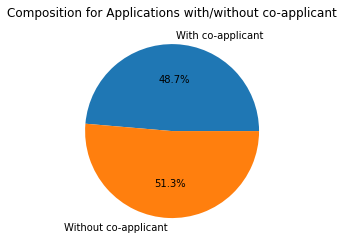

In [155]:
plt.figure()
plt.pie([len(Coappli),len(Nonco)],labels=['With co-applicant', 'Without co-applicant'],autopct='%1.1f%%')
plt.title('Composition for Applications with/without co-applicant')
plt.savefig(image_path+'Composition_for_Applications_with_or_without_co-applicant.png',bbox_inches='tight')

In [156]:
def pie_helper(value_counter,image_path,out_path,title):
        """
        a helper function for generating pie chart

        :param value_counter: value_counts dataframe
        :param image_path: out put image path
        :param out_path: out put image file name+.png
        :param title: picture title
        """
        df=value_counter.reindex(index=Race_l)
        plt.figure(figsize=(10,10))
        df.plot.pie(legend=False, title=title,autopct='%1.1f%%')
        plt.savefig(image_path+out_path, bbox_inches='tight')
  
        return
    

In [157]:
 def pivot_value_helper(df,RaceM):
        """
        get pivot table with gender value counts

        :param df: original data frame
        :return: the pivot table with race value counts
        """
        Race_result = df[['applicant_race_1','action_taken']]
        RecodeAction = {1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
        Race_result_b = pd.DataFrame()
        Race_result_b['action']= Race_result['action_taken'].replace(RecodeAction)
        Race_result_b['applicant_race_1']=Race_result['applicant_race_1'].replace(RaceM)
        Race_result_a1=Race_result_b.pivot_table(index='applicant_race_1', columns='action',aggfunc='size',fill_value=0)
        return Race_result_a1

In [158]:
def bar_helper(df,image_path,out_path,title,RaceM):
        """
        a helper function for generating percentage bar chart

        :param df: original dataframe
        :param image_path: out put image path
        :param out_path: out put image file name+.png
        :param title: picture title
        :param RaceM: gender code map
        """
        Race_result=df[['applicant_race_1','action_taken']]
        RecodeAction={1:"Institution approved",2:"Institution approved", 3:'Institution denied', 7:'Institution denied',8:'Institution approved'}
        Race_result_b=pd.DataFrame()
        Race_result_b['action']= Race_result['action_taken'].replace(RecodeAction)
        Race_result_b['applicant_race_1']=Race_result['applicant_race_1'].replace(RaceM)
        Race_result_a1=Race_result_b.pivot_table(index='applicant_race_1', columns='action',aggfunc='size',fill_value=0)
        totalSA1=Race_result_a1.sum(axis=1)
        Race_result_a2=Race_result_a1.T
        temp=Race_result_a2/totalSA1.values
        Race_result_a2=temp.T*100
        plt.figure()
        SA2B=Race_result_a2.plot.bar(title=title)
        for p in SA2B.patches:
            SA2B.annotate(str("%.2f"%p.get_height())+'%', xy=(p.get_x(), p.get_height()*1.01))
        plt.xticks(rotation=90)
        plt.ylabel('percentage')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.savefig(image_path+out_path, bbox_inches='tight')

        return


# With no co-applicant analysis

<Figure size 432x288 with 0 Axes>

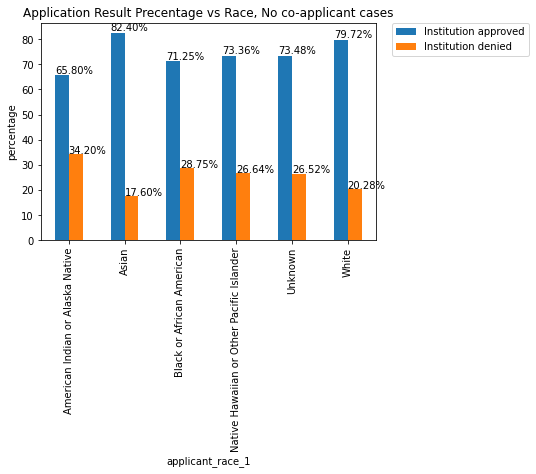

In [159]:
bar_helper(Nonco,image_path,
           'Application_result_percentage_vs_race_no_co-applicant.png',
           'Application Result Precentage vs Race, No co-applicant cases' , RaceMap)

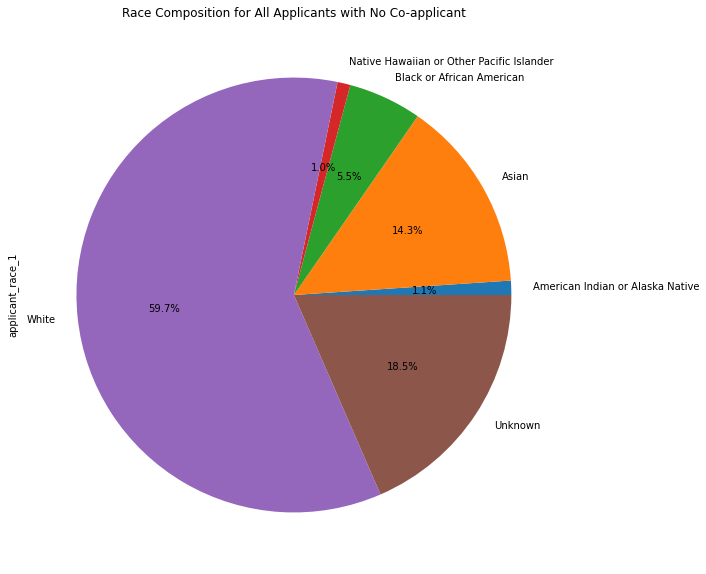

In [160]:
pie_helper(Nonco['applicant_race_1'].replace(RaceMap).value_counts(),image_path,
           'Race_composition_for_all_applicants_no_co-applicant.png','Race Composition for All Applicants with No Co-applicant')

In [161]:
Noncopv=pivot_value_helper(Nonco,RaceMap)
Coapplipv=pivot_value_helper(Coappli,RaceMap)

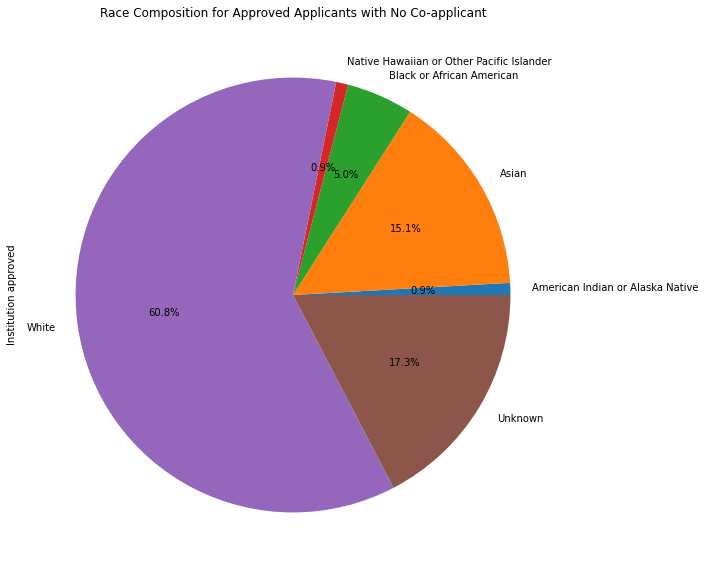

In [162]:
pie_helper(Noncopv['Institution approved'].reindex(index=Race_l),image_path,
           'Approved_applicants_race_no_co-applicant.png','Race Composition for Approved Applicants with No Co-applicant')

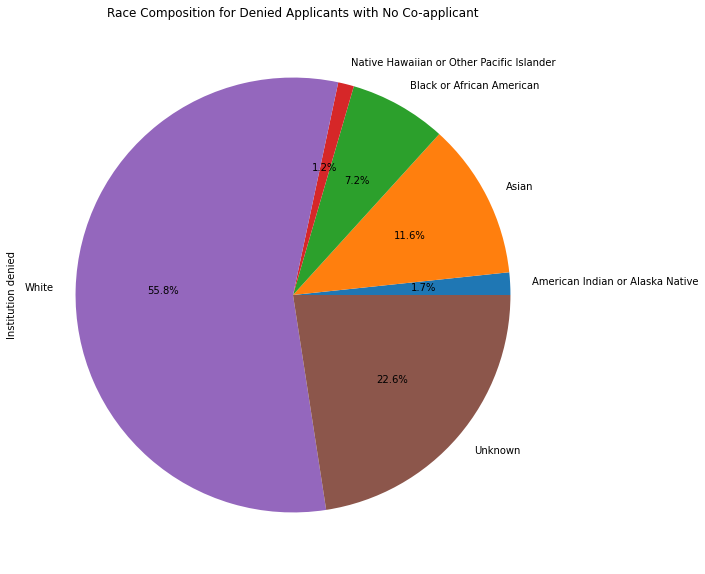

In [163]:
pie_helper(Noncopv['Institution denied'].reindex(index=Race_l),image_path,
           'Denied_applicants_race_no_co-applicant.png','Race Composition for Denied Applicants with No Co-applicant')

 # With co-applicant analysis

<Figure size 432x288 with 0 Axes>

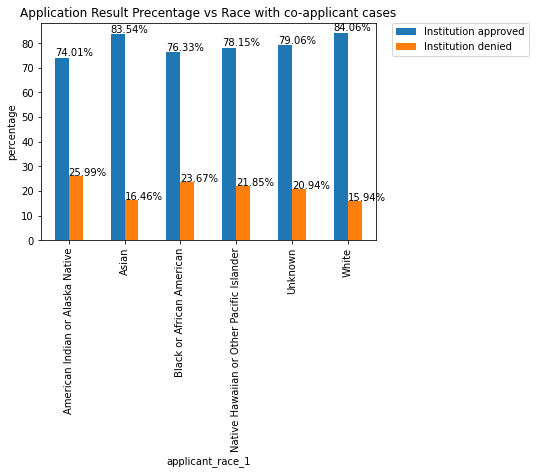

In [164]:
bar_helper(Coappli,image_path,
           'Application_result_percentage_vs_race_co-applicant.png',
           'Application Result Precentage vs Race with co-applicant cases' , RaceMap)

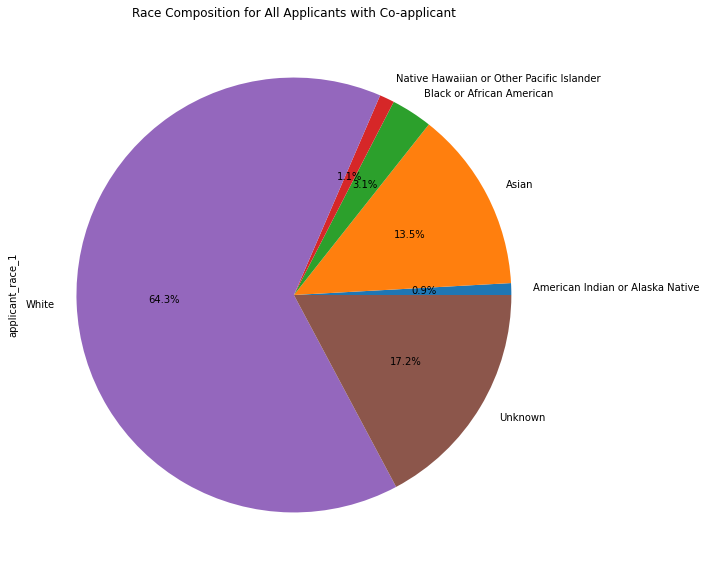

In [165]:
pie_helper(Coappli['applicant_race_1'].replace(RaceMap).value_counts(),image_path,
           'Race_composition_for_all_applicants_co-applicant.png','Race Composition for All Applicants with Co-applicant')

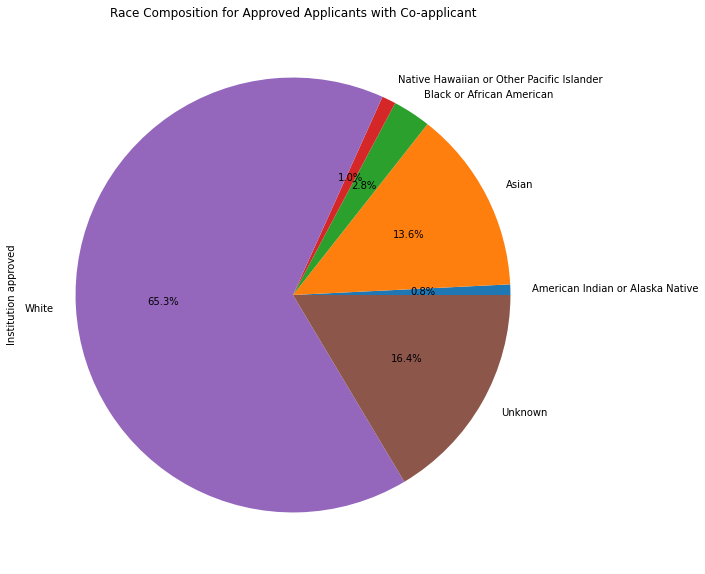

In [166]:
pie_helper(Coapplipv['Institution approved'].reindex(index=Race_l),image_path,
           'Approved_applicants_race_co-applicant.png','Race Composition for Approved Applicants with Co-applicant')

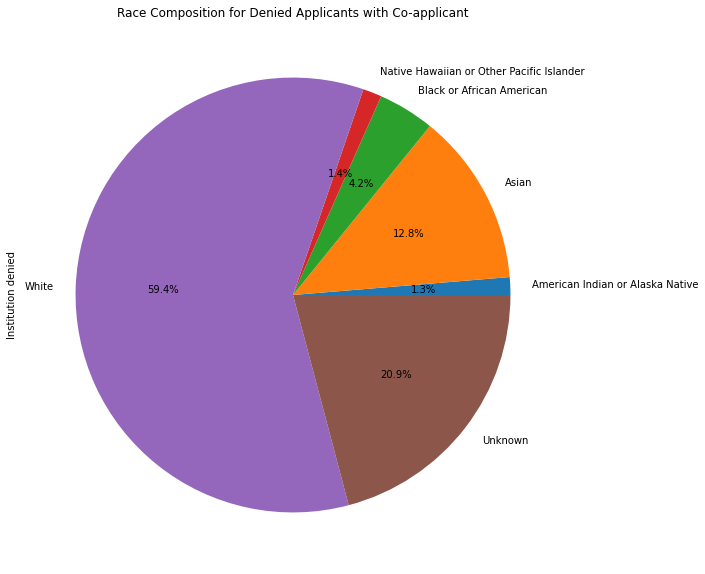

In [167]:
pie_helper(Coapplipv['Institution denied'].reindex(index=Race_l),image_path,
           'Denied_applicants_race_co-applicant.png','Race Composition for Denied Applicants with Co-applicant')